In [2]:
import msprime, tskit, pyslim, time 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sys
import os

In [3]:
plt.rcParams['lines.markersize'] = 3

In [4]:
from kasper_stats import kasper_run_stat

In [14]:
ts1 = tskit.load("../data/processed_ts.trees")
ts2 = tskit.load("../data/out.trees")

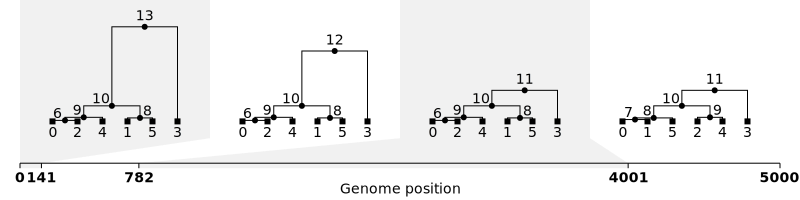

In [6]:
import msprime
from IPython.display import SVG, display

# Simulate an ancestral history for 3 diploid samples under the coalescent
# with recombination on a 5kb region with human-like parameters.
ts1 = msprime.sim_ancestry(
samples=3,
recombination_rate=1e-8,
sequence_length=5_000,
population_size=10_000,
random_seed=123456)
# Visualise the simulated ancestral history.
SVG(ts1.draw_svg())

In [32]:
print(kasper_run_stat(ts1))

[]


In [7]:

def ts_to_df(ts):
    windows = list(ts.breakpoints())
    diversity = ts.diversity(windows=windows)
    branch_length = [tree.total_branch_length for tree in ts.trees()]
    #tmrca = [tree.time(tree.root) for tree in ts.trees()]
    tajimas_D = ts.Tajimas_D(windows=windows)
    df = pd.DataFrame({
        'Position': windows[:-1],
        'Diversity': diversity,
        'Total Branch Length': branch_length,
        'Tajima\'s D': tajimas_D
}, index=[i + 1 for i in range(len(ts.trees()))])
    return df 
  



In [15]:
df = ts_to_df(ts1)

In [16]:
filtered_df = df[df['Tajima\'s D'].notnull()]

In [17]:
filtered_df

,Position,Diversity,Total Branch Length,Tajima's D
1,0.0,0.026003,47104.0,-1.102474
3,1001.0,0.023698,49672.0,-1.502180
5,2003.0,0.036901,43743.0,-0.418510
6,4933.0,0.034011,43734.0,-0.339714
7,25784.0,0.033603,43698.0,-0.259638
...,...,...,...,...
7042,29993237.0,0.033933,55112.0,-0.847946
7043,29995686.0,0.037172,55242.0,-0.569171
7044,29995924.0,0.034474,55262.0,-0.796481
7045,29997095.0,0.038618,55015.0,-0.606565


In [18]:
df = filtered_df

In [19]:
amplicon_intervals = [(2003, 3003), (10003003, 10004003), (20004003, 20005003)]
amplicon_average_positions = [(sum(e) // 2) for e in amplicon_intervals]
amplicon_average_positions

[2503, 10003503, 20004503]

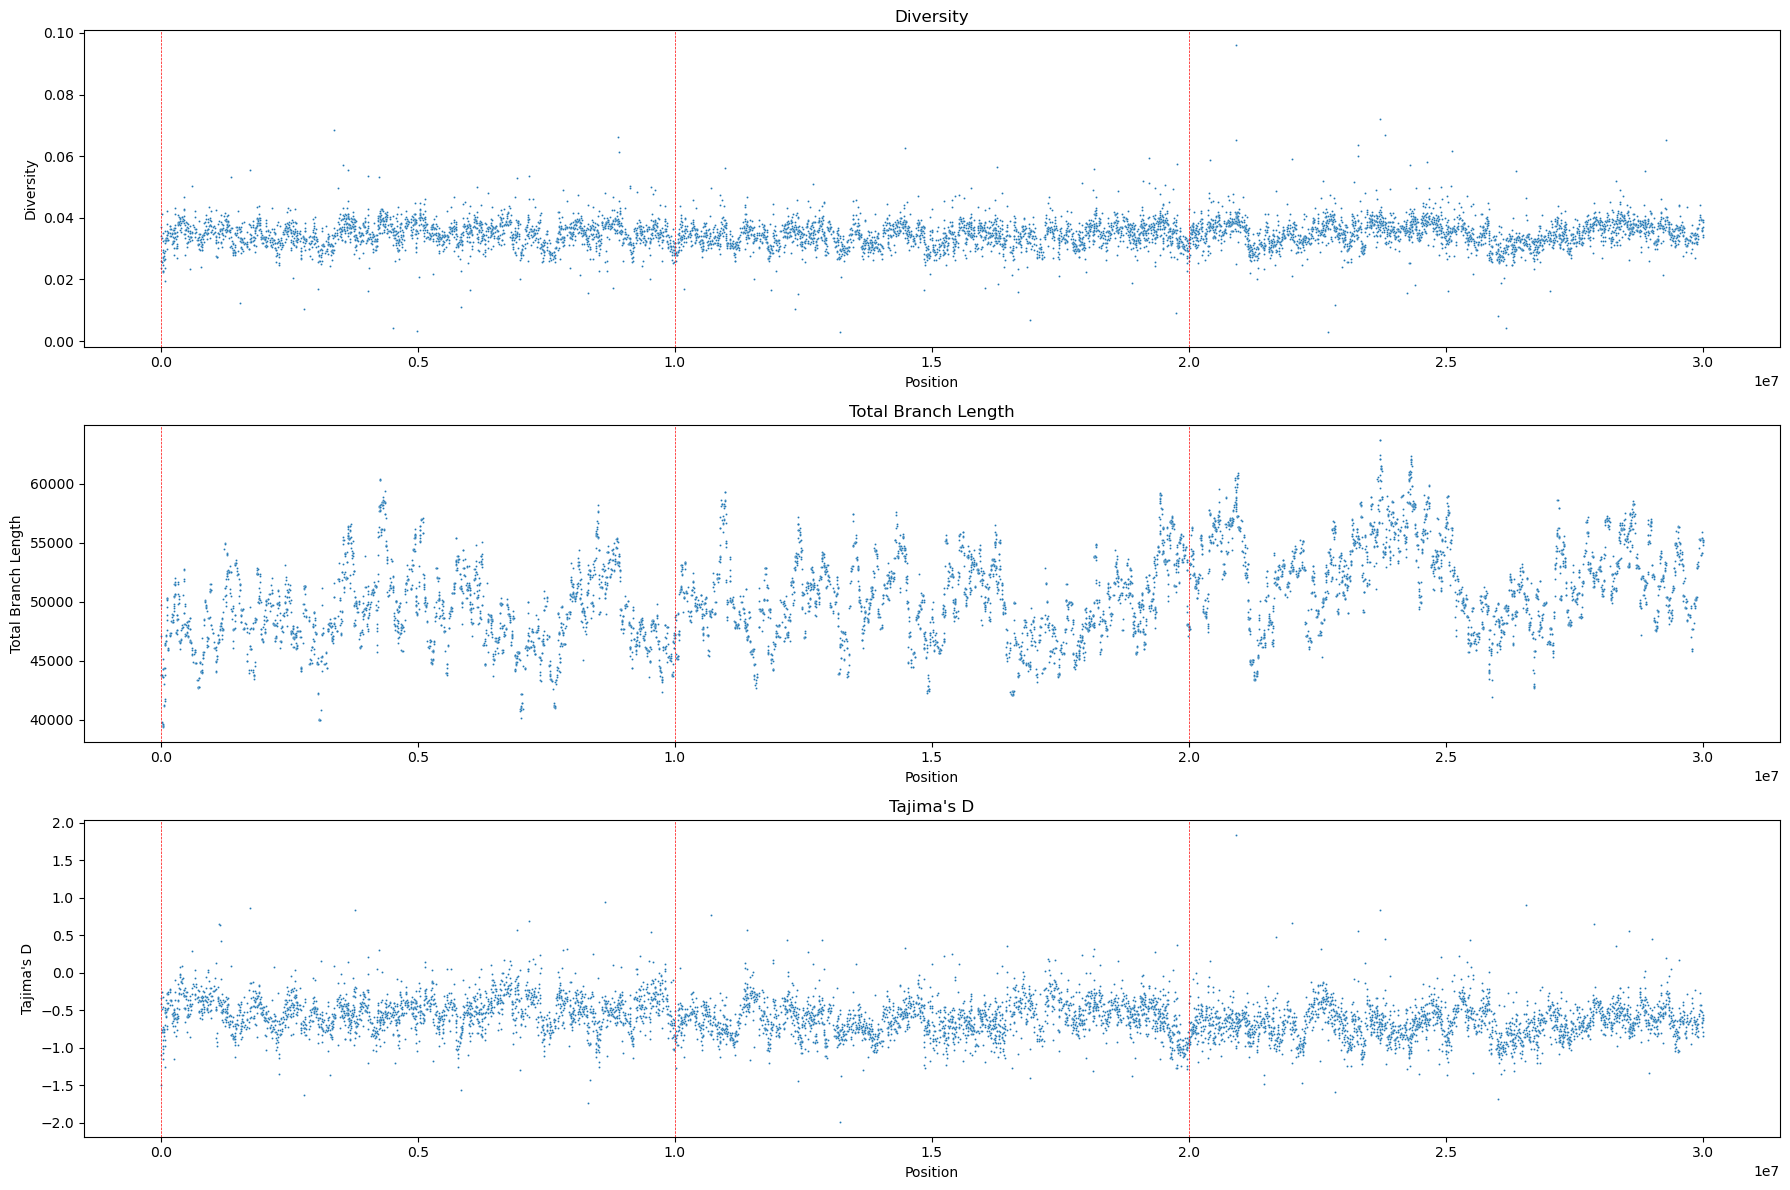

In [22]:
num_cols = len(df.columns) - 1
fig, axes = plt.subplots(nrows=num_cols, ncols=1, figsize=(18, num_cols*4))


for i, col in enumerate(df.columns[1:]):
    sns.scatterplot(data=df, x='Position', y=col, ax=axes[i], s=2)   
    axes[i].set_title(f'{col}')
    for vline in amplicon_average_positions:
        axes[i].axvline(x = vline, color='red', linestyle='--', lw = 0.5)

plt.tight_layout()
plt.show()

In [37]:
print(list(ts.breakpoints()))

[0.0, 1000.0, 1001.0, 2002.0, 2003.0, 4933.0, 10349.0, 13748.0, 13793.0, 15463.0, 20296.0, 25090.0, 25784.0, 26169.0, 26385.0, 29690.0, 36859.0, 37808.0, 41162.0, 41347.0, 41767.0, 42060.0, 42461.0, 44791.0, 45045.0, 45127.0, 45949.0, 50705.0, 52500.0, 54007.0, 56996.0, 62334.0, 66636.0, 67553.0, 74153.0, 75971.0, 79282.0, 81194.0, 81483.0, 82960.0, 84299.0, 87229.0, 90363.0, 91895.0, 98722.0, 98787.0, 103082.0, 103404.0, 105984.0, 106371.0, 110127.0, 113176.0, 113552.0, 114348.0, 115989.0, 116165.0, 122110.0, 124348.0, 125667.0, 126519.0, 132847.0, 139370.0, 140790.0, 143541.0, 146601.0, 148585.0, 166650.0, 174026.0, 178238.0, 181410.0, 184026.0, 184245.0, 188544.0, 195636.0, 200565.0, 204030.0, 208738.0, 212301.0, 218610.0, 220144.0, 228874.0, 231796.0, 233619.0, 234068.0, 235513.0, 239172.0, 240984.0, 241063.0, 243240.0, 243525.0, 248636.0, 249021.0, 250986.0, 252045.0, 252098.0, 253283.0, 257558.0, 264983.0, 267024.0, 267079.0, 270121.0, 271871.0, 275912.0, 277358.0, 278347.0, 2796

In [ ]:
#tmrca = [tree.time(tree.root) for tree in ts2.trees() if len(tree.roots) == 1]
c = 0
for tree in ts1.trees():
    #if tree.roots == 1:
    c +=1
    print(tree.time(tree.roots[0]))
#tmrca
c